<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ajuarezjc/blob/main/DataAnalysisPython_Module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alejandro Juarez C A01168444

Data Analysis with Python
Module 2

### Notes on PreProcessing

In a panda dataFrame, we can access a column directly with
dataFrame['name_of_column']


### Missing value
Represented with Nan, 0 or blank space

Options to handle missing data
-Trying to find the data
-Drop the variable
-Drop the entry
-Replace the value
  -With the average value of the column
  -For categorial variables, we can use the mode (most common) value
-Leave the missing data


### How to drop missing values

dataframes.dropna(subset, axis, inplace)
subset = [Columns] Columns to check for Nan. If empty, will do on all the dataframe
axis = 0 Drops the entire row
axis = 1 Drops the entire column
inplace = True Saves the data back into the dataframe

Replacing values of a dataframe
dataframe[column].replace(old_value, new_value)
Example of replacing with mean of column
To get the mean
mean = df['column'].mean()
To replace the value on all missing values
df['column'].replace(np.nan, mean)

### Data Formatting
df['column'] = _operation_ & df['column']

### Correcting data types
To identify data types
dataframe.dtypes() to check all data types per column
To convert data types
dataframe.astype() to convert from one dtype to another

Example converting Object (String) to Integer
df['column'] = df['column'].astype("int")

### Data Normalization

Normalization: Uniform the features value to fit into a range, to avoid a feature has more 'weight' into our model

Ways to normalize:

Simple Feature Scaling
Xnew = Xold / Xmax

MinMax Scaling
Xnew = (Xold - Xmin) / (Xmax - Xmin)

Z-score
Xnew = (Xold - Xaverage) / Xstandard_deviation

To obtain those calculations on a given column with Pandas:
Max = df['column'].max()
Min = df['column'].min()
Mean = df['column'].mean()
StandardDeviation = df['column'].std()

We execute the operation on all the column, for example using MinMax Scaler:
df['column'] = ( df['column']-df['column'].min() ) / ( df['column'].max() - df['column'].min )

### Binning 

Taking slots of values into categories, that could improve accuracy of models
For example, binning hundreds of individual integer values into 3 bins: low, medium, high, we set what the binning means

Example of Binning

First, we get the the number of equal spacing between our categories

bins = np.linspace( min(df['column']) , max(df['column']) , n+1)

Where n is the number of bins we need 

Then, we define the group names, from lowest to highest
group_names = ["Low", "Medium", "High"]

Create new column with binned data using Pandas cut()
pd.cut( column_to_bin , ranges_of_bins , labels_per_bin , include_lowest)
df['binned_column'] = pd.cut( df['column'] , bins , labels=group_names,  include_lowest=True )

### Turning categorical into numerical values

Also called One-Hot Encoding

Getting n columns (separated) depending on how many n different categorical values are. Then, we obtain a dataframe with n columns, representing each category as binary with only 1 of n "turned on". The rest are set to 0

df_encoded = pd.get_dummies(df['column'])





In [45]:
'''

LAB 2

'''
import pandas as pd
import numpy as np

# Downloading the data
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


#Getting the data
df = pd.read_csv(filename, names = headers)
df.head()
df.replace("?", np.nan, inplace = True) #Replacing null values
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [46]:
# Questions

# Replace NaN in Stroke column with the mean value
strokeMean = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, strokeMean, inplace=True)

# Mean of horsepower
horsepowerMean = df["horsepower"].astype("float").mean()
print("Mean Horsepower", horsepowerMean)

#Replace mean into Nan in horsepower
df['horsepower'].replace(np.nan, horsepowerMean, inplace = True)

# Calculate the mean value for "peak-rpm" column
peakRPMmean = df['peak-rpm'].astype("float").mean()
print("Mean Peak RPM", peakRPMmean)

# Replace "NaN" with the mean value in the "peak-rpm" column
df['peak-rpm'].replace(np.nan, peakRPMmean, inplace=True)

#Dropping rows with no price column
df.dropna(subset=['price'], axis = 0, inplace=True)
df.reset_index(drop=True, inplace=True)

#Converting data types to proper format
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

print(df.dtypes)

# Data normalization
df['city-L/100km'] = 235/df["city-mpg"]

#According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".
df["highway-mpg"] = 235/df["highway-mpg"] 
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

#According to the example above, normalize the column "height".
df['height'] = df['height']/df['height'].max() 
df.head()

#One Hot Encoding

dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

# Similar to before, create an indicator variable for the column "aspiration"
aspirationDummies = pd.get_dummies(df['aspiration'])
aspirationDummies.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True) 
aspirationDummies.head()

# Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.
df = pd.concat([df, aspirationDummies], axis=1)
df.drop('aspiration', axis = 1, inplace=True)
df.to_csv('clean_df.csv')

Mean Horsepower 104.25615763546799
Mean Peak RPM 5125.369458128079
symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


Review Questions Evidence

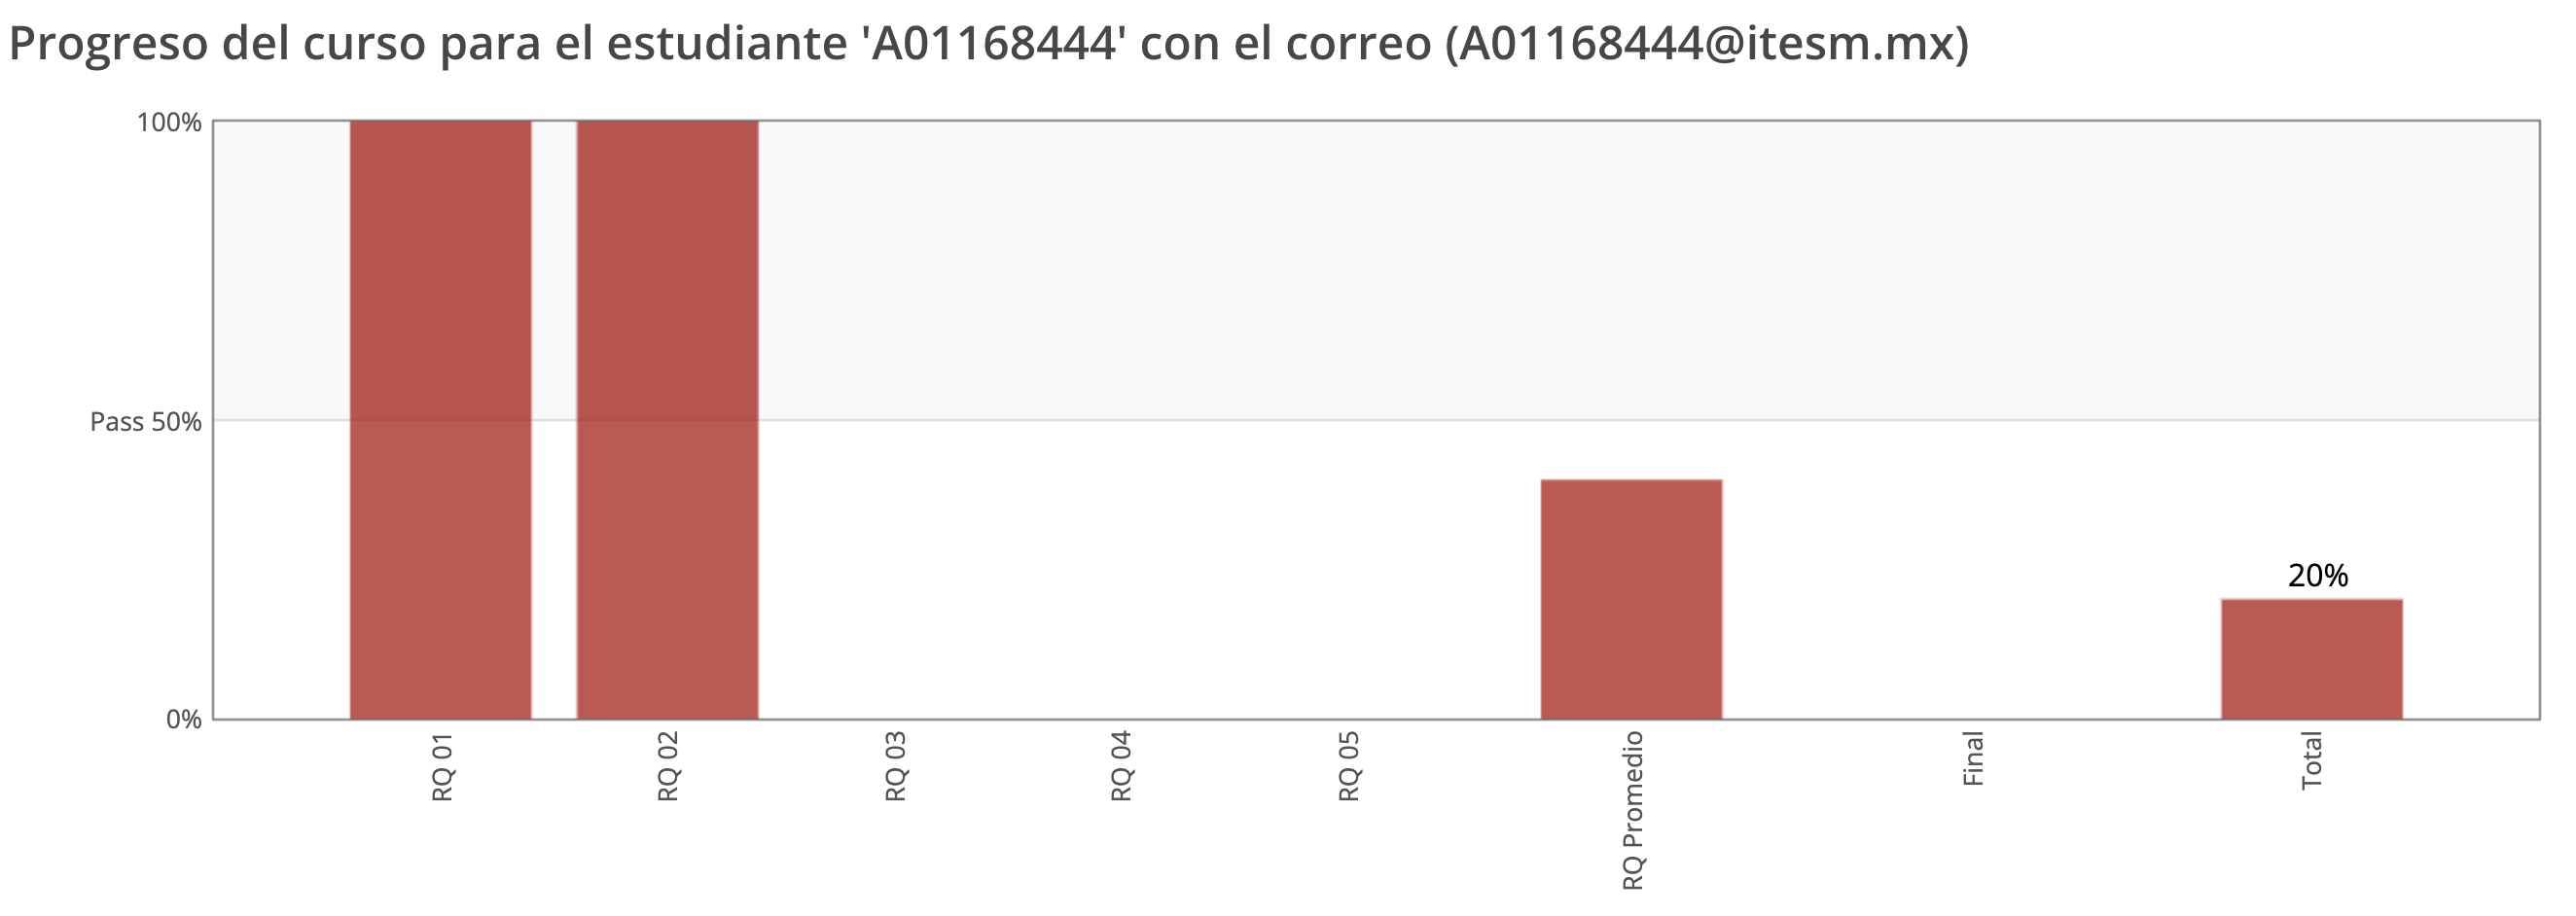